![](https://cdn3.vectorstock.com/i/1000x1000/98/02/set-of-monochrome-icons-with-kannada-numbers-vector-15469802.jpg)

## Importing whatever we need !

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

### Loading data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


### Understanding the data <a id="1" ></a>

In [3]:
print('The Train  dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The Test  dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))


The Train  dataset has 60000 rows and 785 columns
The Test  dataset has 5000 rows and 785 columns


In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)
test=test.drop('id',axis=1)


### Checking Target class distribution..


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='label'>

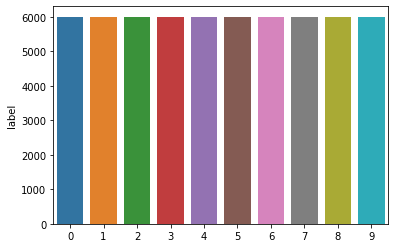

In [6]:
y=train.label.value_counts()
sns.barplot(y.index,y)

## Data preparation <a id='2'></a>

In [7]:
X_train=train.drop('label',axis=1)
Y_train=train.label

### Normalize Pixel Values



In [8]:
X_train=X_train/255
test=test/255

### Reshape

In [9]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [10]:
print('The shape of train set now is',X_train.shape)
print('The shape of test set now is',test.shape)


The shape of train set now is (60000, 28, 28, 1)
The shape of test set now is (5000, 28, 28, 1)


### Encoding Target Values

In [11]:
Y_train=to_categorical(Y_train)

### Splitting train and test

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.15)

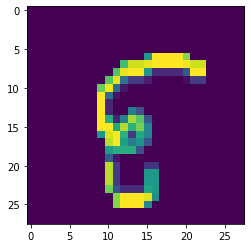

In [13]:
plt.imshow(X_train[0][:,:,0])

### More data !

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


## Modelling <a id='4' ></a>

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

### Optimizer


In [17]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [18]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

### Learning rate reduction

In [19]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Fitting our model <a id='5'></a>

In [20]:
epochs=5 #change this to 30 if you need to get better score
batch_size=64

In [21]:
# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/5
796/796 - 278s - loss: 0.2714 - accuracy: 0.9130 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 2/5
796/796 - 260s - loss: 0.0691 - accuracy: 0.9801 - val_loss: 0.0378 - val_accuracy: 0.9899
Epoch 3/5
796/796 - 288s - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0205 - val_accuracy: 0.9943
Epoch 4/5
796/796 - 290s - loss: 0.0447 - accuracy: 0.9868 - val_loss: 0.0370 - val_accuracy: 0.9907
Epoch 5/5
796/796 - 297s - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0180 - val_accuracy: 0.9940


## Evaluating our approach <a id='6'></a>

Text(0, 0.5, 'accuracy')

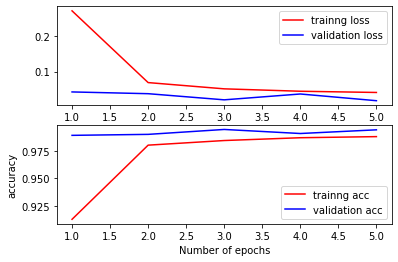

In [22]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')


### Confusion matrix



In [23]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)


In [24]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))



In [25]:
conf

,0,1,2,3,4,5,6,7,8,9
0,846,11,0,1,0,0,0,0,0,0
1,0,913,0,0,0,0,0,0,0,0
2,1,0,906,0,0,1,0,0,0,0
3,0,0,0,888,0,1,0,1,0,0
4,0,0,0,0,921,2,0,0,2,1
5,0,0,0,1,1,872,0,0,0,0
6,0,0,0,0,0,0,860,2,0,0
7,0,0,2,15,0,0,2,914,0,0
8,0,0,0,0,0,1,0,0,917,0
9,1,0,0,0,0,0,8,0,0,909


<AxesSubplot:>

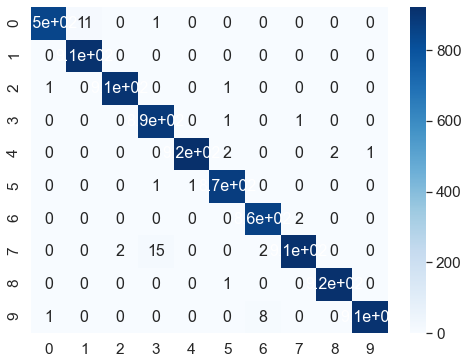

In [26]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)# font size

## Further Investigation..



In [27]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

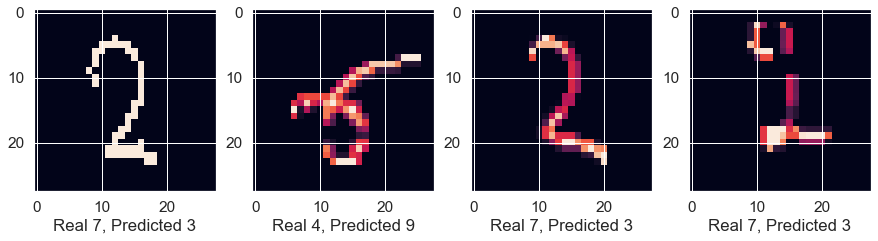

In [28]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,15))

for i in range(4):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))



hmm...Not all them,but some of them are a bit tough ones.